In [68]:
import csv 
import pandas as pd 
df = pd.read_csv('states_all.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [105]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import numpy as np
from matplotlib import pyplot as plt 

def cluster_optimization(sample_features):
    '''
    Given a data sample's feature vectors, this function produces a knee graph that visualizes the optimal number of clusters 
    to group by. 
    param sample_features: (n_samples, n_features) numpy array 
    '''
    K= np.array([2,3,4,5,6,7,8,9,10]) #K values to try 
    j_k= np.zeros(len(K)) #empty array to store sum of distances between samples and their closest center across 10 fits, for each k
    for l in range(10):
        for k in range(len(K)):
            #fit kmeans with feature data for current k 
            kmeans = KMeans(n_clusters=K[k],random_state=0).fit(sample_features)
            #get the sum of distances between each sample and its closest cluster center 
            inertia= kmeans.inertia_ 
            j_k[k]+=inertia  #append to inertia score for current k
    j_k= j_k/10 #average inertia score of all ks
    #diplay
    plt.plot(K,j_k)
    plt.title("J*k")
    plt.xlabel("K")
    plt.ylabel("J*k")

Use K-Means to gain intution about the structure of our data.

In [103]:
'''
Goal1: Identify Structure of Data 
Get a meaningful intuiton of the structure of the data samples when viewed on select feature spaces. 
Through this intutition, we hope to gain a sense of what features may or may not be appropriate choices for independent variables,
when making a multivariate regression model that predicts the dependent variable total revenue.
'''

#feature selection
#depedent feature (variable to be projected)
total_revenue= list(df['TOTAL_REVENUE'].dropna())
federal_revenue= list(df['FEDERAL_REVENUE'].dropna())
state_revenue= list(df['STATE_REVENUE'].dropna())
local_revenue= list(df['LOCAL_REVENUE'].dropna())

#feature scaling: for each feature vector, the mean is shifted to zero, the unit variance is scaled down to one
scaler1= StandardScaler()
total_revenueS= scaler1.fit_transform(np.asarray(total_revenue).reshape(-1,1))
scaler2= StandardScaler()
federal_revenueS= scaler2.fit_transform(np.asarray(federal_revenue).reshape(-1,1))
scaler3= StandardScaler()
state_revenueS=scaler3.fit_transform(np.asarray(state_revenue).reshape(-1,1))
scaler4= StandardScaler()
local_revenueS=scaler4.fit_transform(np.asarray(local_revenue).reshape(-1,1))

for i in range(len(total_revenueS)):
    total_revenueS[i]=total_revenueS[i][0]
for i in range(len(federal_revenueS)):
    federal_revenueS[i]=federal_revenueS[i][0]
for i in range(len(state_revenueS)):
    state_revenueS[i]=state_revenueS[i][0]
for i in range(len(local_revenueS)):
    local_revenueS[i]=local_revenueS[i][0]
    
print(total_revenueS.shape)

#construct feature space for 
#1a.) (Total_revenue, federal_revenue)
df1=pd.DataFrame()
df1['TOTAL_REVENUE']=total_revenue
df1['FEDERAL_REVENUE']=federal_revenue
df1= np.asarray(df1)

#1a.) (Total_revenue, federal_revenue)
df1S=pd.DataFrame()
df1S['TOTAL_REVENUE']=list(total_revenueS)
df1S['FEDERAL_REVENUE']=list(federal_revenueS)
df1S= np.asarray(df1S)

#2a.) (Total_revenue, state_revenue)
df2=pd.DataFrame()
df2['TOTAL_REVENUE']=total_revenue
df2['STATE_REVENUE']=state_revenue
df2= np.asarray(df2)

#2a.) (Total_revenue, state_revenue)
df2S=pd.DataFrame()
df2S['TOTAL_REVENUE']=list(total_revenueS)
df2S['STATE_REVENUE']=list(state_revenueS)
df2S= np.asarray(df2S)


#3a.) (Total_revenue, local_revenue)
df3=pd.DataFrame()
df3['TOTAL_REVENUE']=total_revenue
df3['LOCAL_REVENUE']=local_revenue
df3= np.asarray(df3)

#3a.) (Total_revenue, local_revenue)
df3S=pd.DataFrame()
df3S['TOTAL_REVENUE']=list(total_revenueS)
df3S['LOCAL_REVENUE']=list(local_revenueS)
df3S= np.asarray(df3S)

(1275, 1)


Centroid Coordinates in Feature Space (TOTAL_REVENUE,FEDERAL_REVENUE):
Center 0 Coordinates: (0.45295153580613273e7,0.03859288565776455e7)
Center 1 Coordinates: (5.820854590476191e7,0.5606592000000001e7)
Center 2 Coordinates: (2.0635172657657654e7,0.15912990495495494e7)


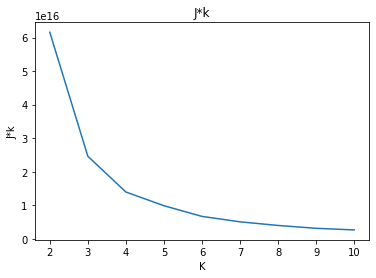

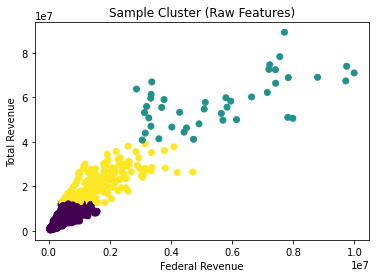

Centroid Coordinates in Feature Space (TOTAL_REVENUE,FEDERAL_REVENUE):
Center 0 Coordinates: (1.1085997248659758e-07e7,8.715600819336722e-08e7)
Center 1 Coordinates: (-3.609387096176252e-08e7,-3.22310625535458e-08e7)
Center 2 Coordinates: (4.23715201737125e-07e7,4.340148238302353e-07e7)


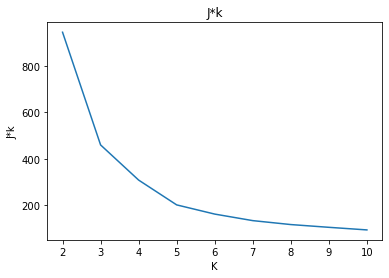

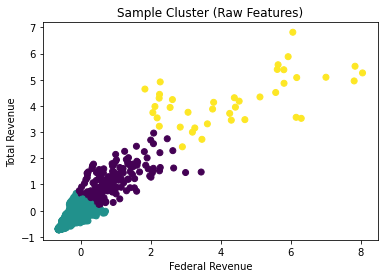

In [106]:
#visualize structure of samples along the feature axis: (total_revenue, federal_revenue)
cluster_optimization(df1)
kmeans = KMeans(n_clusters=3,random_state=0).fit(df1)
labels= kmeans.labels_
centroids= list(kmeans.cluster_centers_)
print("Centroid Coordinates in Feature Space (TOTAL_REVENUE,FEDERAL_REVENUE):")
print("Center 0 Coordinates: ({s}e7,{t}e7)".format(s=centroids[0][0]/10**7,t=centroids[0][1]/10**7))
print("Center 1 Coordinates: ({s}e7,{t}e7)".format(s=centroids[1][0]/10**7,t=centroids[1][1]/10**7))
print("Center 2 Coordinates: ({s}e7,{t}e7)".format(s=centroids[2][0]/10**7,t=centroids[2][1]/10**7))
plt.figure()
plt.scatter(df1[:,1],df1[:,0],c=labels)
plt.title('Sample Clusters (Raw Features)')
plt.ylabel('Total Revenue')
plt.xlabel('Federal Revenue')
plt.show()

#visualize structure of samples along the normalized feature axis: (total_revenue, federal_revenue)
cluster_optimization(df1S)
kmeans = KMeans(n_clusters=3,random_state=0).fit(df1S)
labels= kmeans.labels_
centroids= list(kmeans.cluster_centers_)
print("Centroid Coordinates in Feature Space (TOTAL_REVENUE,FEDERAL_REVENUE):")
print("Center 0 Coordinates: ({s},{t})".format(s=centroids[0][0],t=centroids[0][1]))
print("Center 1 Coordinates: ({s},{t})".format(s=centroids[1][0],t=centroids[1][1]))
print("Center 2 Coordinates: ({s},{t})".format(s=centroids[2][0],t=centroids[2][1]))
plt.figure()
plt.scatter(df1S[:,1],df1S[:,0],c=labels)
plt.title('Sample Clusters (Normalized Features)')
plt.ylabel('Total Revenue')
plt.xlabel('Federal Revenue')
plt.show()

Centroid Coordinates in Feature Space (TOTAL_REVENUE,STATE_REVENUE):
Center 0 Coordinates: (2.010753464135021e7,0.8650688202531646e7)
Center 1 Coordinates: (0.44144799518072314e7,0.21720408945783032e7)
Center 2 Coordinates: (5.816189388095237e7,2.7897770619047613e7)


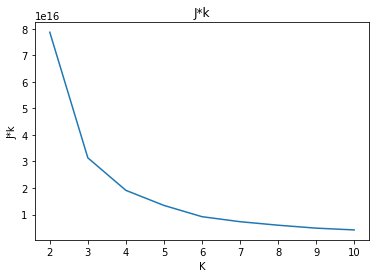

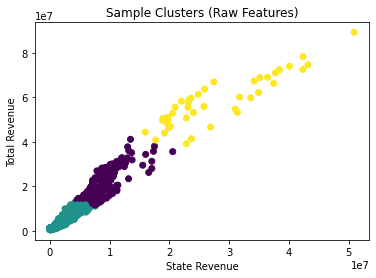

Centroid Coordinates in Feature Space (TOTAL_REVENUE,FEDERAL_REVENUE):
Center 0 Coordinates: (-0.4073534294832731,-0.3815578363669247)
Center 1 Coordinates: (4.128921244159475,4.236710776027245)
Center 2 Coordinates: (0.8847414375467464,0.7654568689513218)


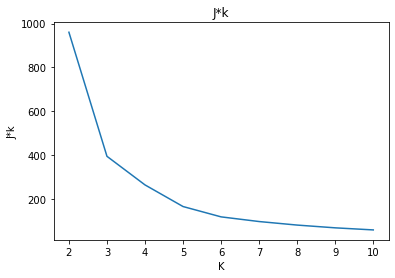

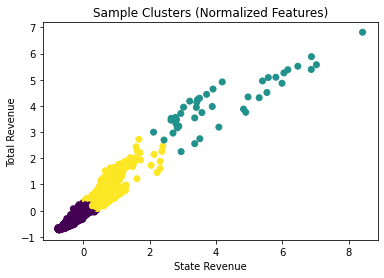

In [108]:
#visualize structure of sample along the feature axis: (total_revenue, state_revenue)
cluster_optimization(df2)
kmeans = KMeans(n_clusters=3,random_state=0).fit(df2)
labels= kmeans.labels_
centroids= list(kmeans.cluster_centers_)
print("Centroid Coordinates in Feature Space (TOTAL_REVENUE,STATE_REVENUE):")
print("Center 0 Coordinates: ({s}e7,{t}e7)".format(s=centroids[0][0]/10**7,t=centroids[0][1]/10**7))
print("Center 1 Coordinates: ({s}e7,{t}e7)".format(s=centroids[1][0]/10**7,t=centroids[1][1]/10**7))
print("Center 2 Coordinates: ({s}e7,{t}e7)".format(s=centroids[2][0]/10**7,t=centroids[2][1]/10**7))
plt.figure()
plt.scatter(df2[:,1],df2[:,0],c=labels)
plt.title('Sample Clusters (Raw Features)')
plt.ylabel('Total Revenue')
plt.xlabel('State Revenue')
plt.show()

#visualize structure of samples along the normalized feature axis: (total_revenue, state_revenue)
cluster_optimization(df2S)
kmeans = KMeans(n_clusters=3,random_state=0).fit(df2S)
labels= kmeans.labels_
centroids= list(kmeans.cluster_centers_)
print("Centroid Coordinates in Feature Space (TOTAL_REVENUE,FEDERAL_REVENUE):")
print("Center 0 Coordinates: ({s},{t})".format(s=centroids[0][0],t=centroids[0][1]))
print("Center 1 Coordinates: ({s},{t})".format(s=centroids[1][0],t=centroids[1][1]))
print("Center 2 Coordinates: ({s},{t})".format(s=centroids[2][0],t=centroids[2][1]))
plt.figure()
plt.scatter(df2S[:,1],df2S[:,0],c=labels)
plt.title('Sample Clusters (Normalized Features)')
plt.ylabel('Total Revenue')
plt.xlabel('State Revenue')
plt.show()

Centroid Coordinates in Feature Space (TOTAL_REVENUE,FEDERAL_REVENUE):
Center 0 Coordinates: (0.4632320975562074e7,0.19170359550342042e7)
Center 1 Coordinates: (5.8208545904761895e7,2.492650135714285e7)
Center 2 Coordinates: (2.105468570952381e7,1.0632737666666665e7)


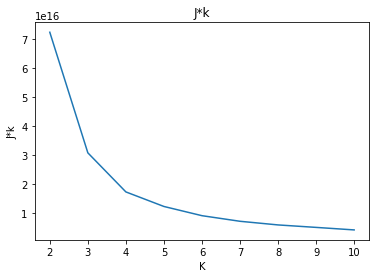

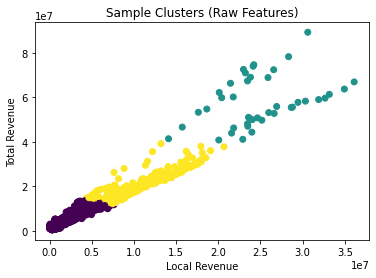

Centroid Coordinates in Feature Space (TOTAL_REVENUE,FEDERAL_REVENUE):
Center 0 Coordinates: (-0.37784933370130547,-0.40171027220175115)
Center 1 Coordinates: (4.170184867784046,3.8219244858125574)
Center 2 Coordinates: (1.0132533648957263,1.2001458867486403)


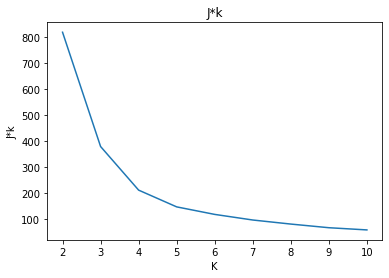

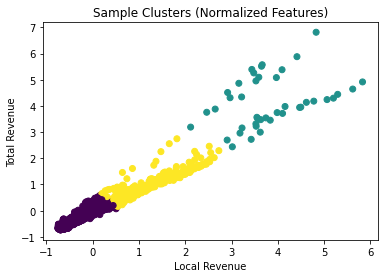

In [109]:
#visualize structure of sample along the feature axis: (total_revenue, local_revenue)
cluster_optimization(df3)
kmeans = KMeans(n_clusters=3,random_state=0).fit(df3)
labels= kmeans.labels_
centroids= list(kmeans.cluster_centers_)
print("Centroid Coordinates in Feature Space (TOTAL_REVENUE,FEDERAL_REVENUE):")
print("Center 0 Coordinates: ({s}e7,{t}e7)".format(s=centroids[0][0]/10**7,t=centroids[0][1]/10**7))
print("Center 1 Coordinates: ({s}e7,{t}e7)".format(s=centroids[1][0]/10**7,t=centroids[1][1]/10**7))
print("Center 2 Coordinates: ({s}e7,{t}e7)".format(s=centroids[2][0]/10**7,t=centroids[2][1]/10**7))
plt.figure()
plt.scatter(df3[:,1],df3[:,0],c=labels)
plt.title('Sample Clusters (Raw Features)')
plt.ylabel('Total Revenue')
plt.xlabel('Local Revenue')
plt.show()

#visualize structure of samples along the normalized feature axis: (total_revenue, local_revenue)
cluster_optimization(df3S)
kmeans = KMeans(n_clusters=3,random_state=0).fit(df3S)
labels= kmeans.labels_
centroids= list(kmeans.cluster_centers_)
print("Centroid Coordinates in Feature Space (TOTAL_REVENUE,FEDERAL_REVENUE):")
print("Center 0 Coordinates: ({s},{t})".format(s=centroids[0][0],t=centroids[0][1]))
print("Center 1 Coordinates: ({s},{t})".format(s=centroids[1][0],t=centroids[1][1]))
print("Center 2 Coordinates: ({s},{t})".format(s=centroids[2][0],t=centroids[2][1]))
plt.figure()
plt.scatter(df3S[:,1],df3S[:,0],c=labels)
plt.title('Sample Clusters (Normalized Features)')
plt.ylabel('Total Revenue')
plt.xlabel('Local Revenue')
plt.show()